# Dimensionality reduction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import napari
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from napari.utils.notebook_display import nbscreenshot

from napari_sediment.hyperanalysis_widget import HyperAnalysisWidget
plt.style.use('default')

In [11]:
viewer =napari.Viewer()
self = HyperAnalysisWidget(viewer)
viewer.window.add_dock_widget(self);

In [12]:
export_folder = Path('/Users/gw18g940/Desktop/Test_data/Zahajska/synthetic/export/synthetic1_out/')
self._on_click_select_export_folder(alternate_path=export_folder)
self.import_project()
self._on_click_select_all()

## Main

In the Main tab, one can select again the project exported previously. Only the data subset is loaded and disaplayed. As it is much smaller that the full image, all bands can be loaded at once.

/Users/gw18g940/mambaforge/envs/spectral20223/lib/python3.10/site-packages/napari/utils/notebook_display.py:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  get_app().processEvents()


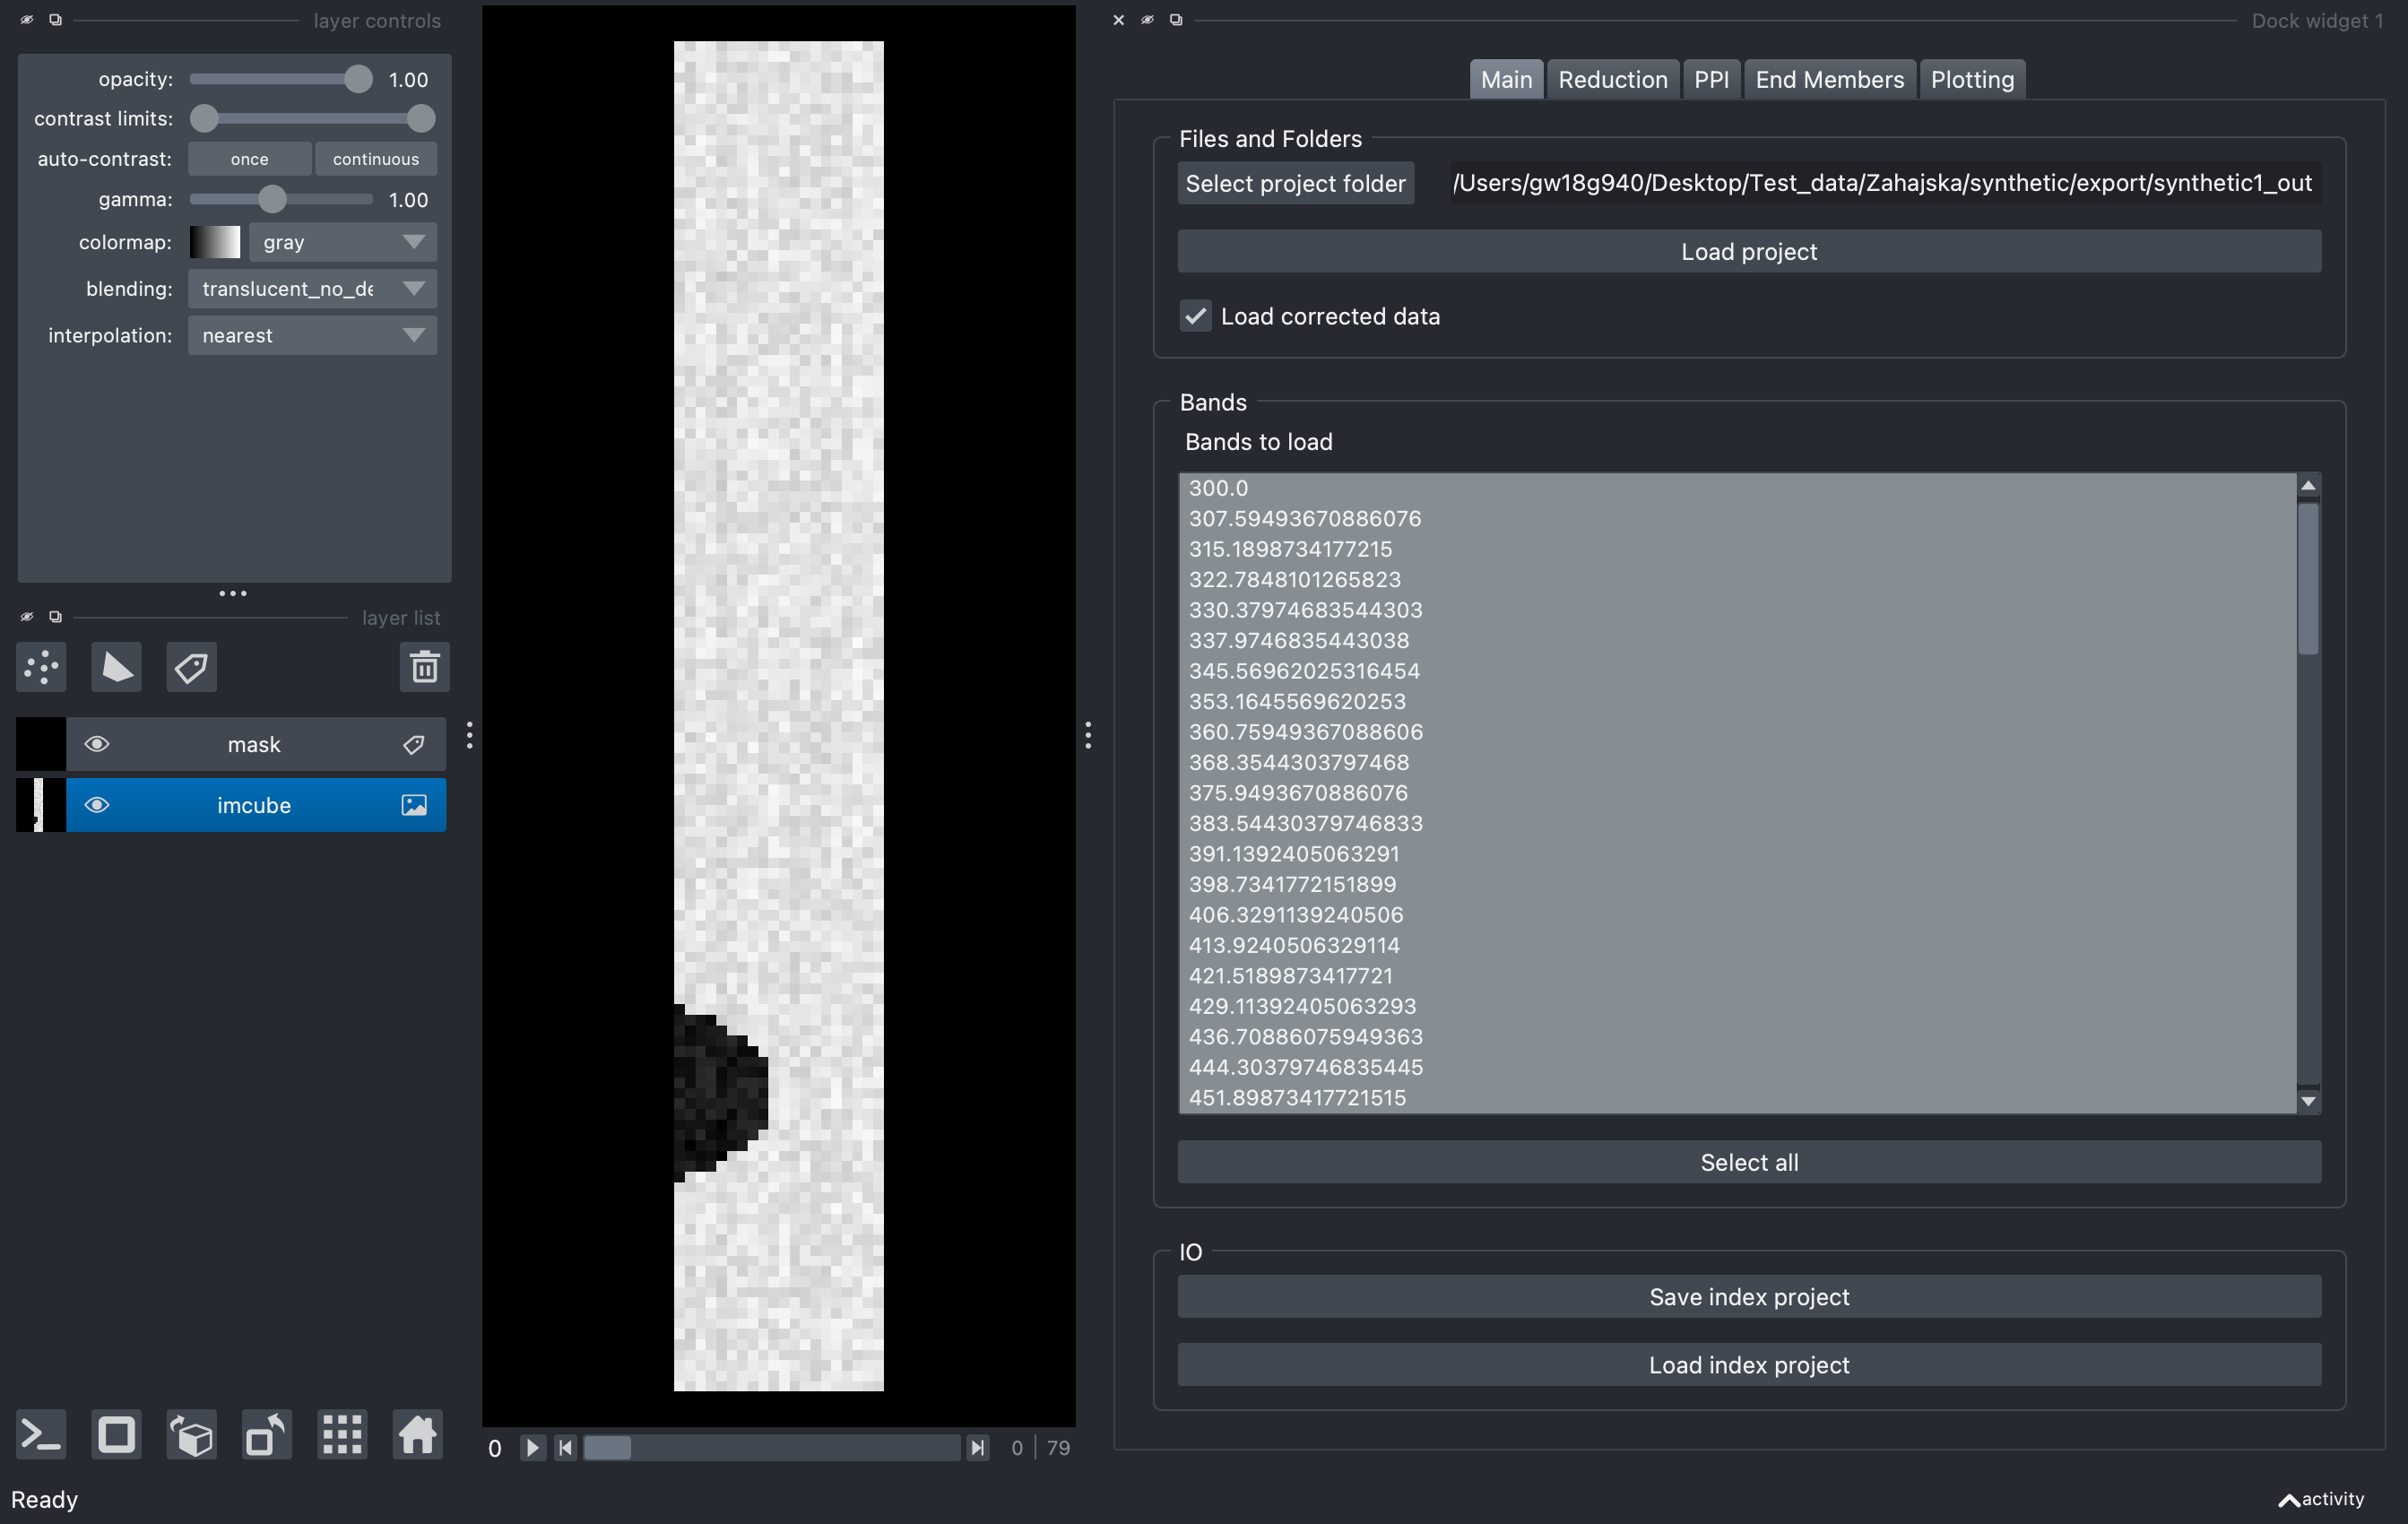

In [13]:
nbscreenshot(viewer)

The IO section allows to save or load this stage of the analysis.

## Reduction

This tab allows to perform a spectral reduction of the data, i.e. identify a subset of bands that captures the most relevant information in the data.

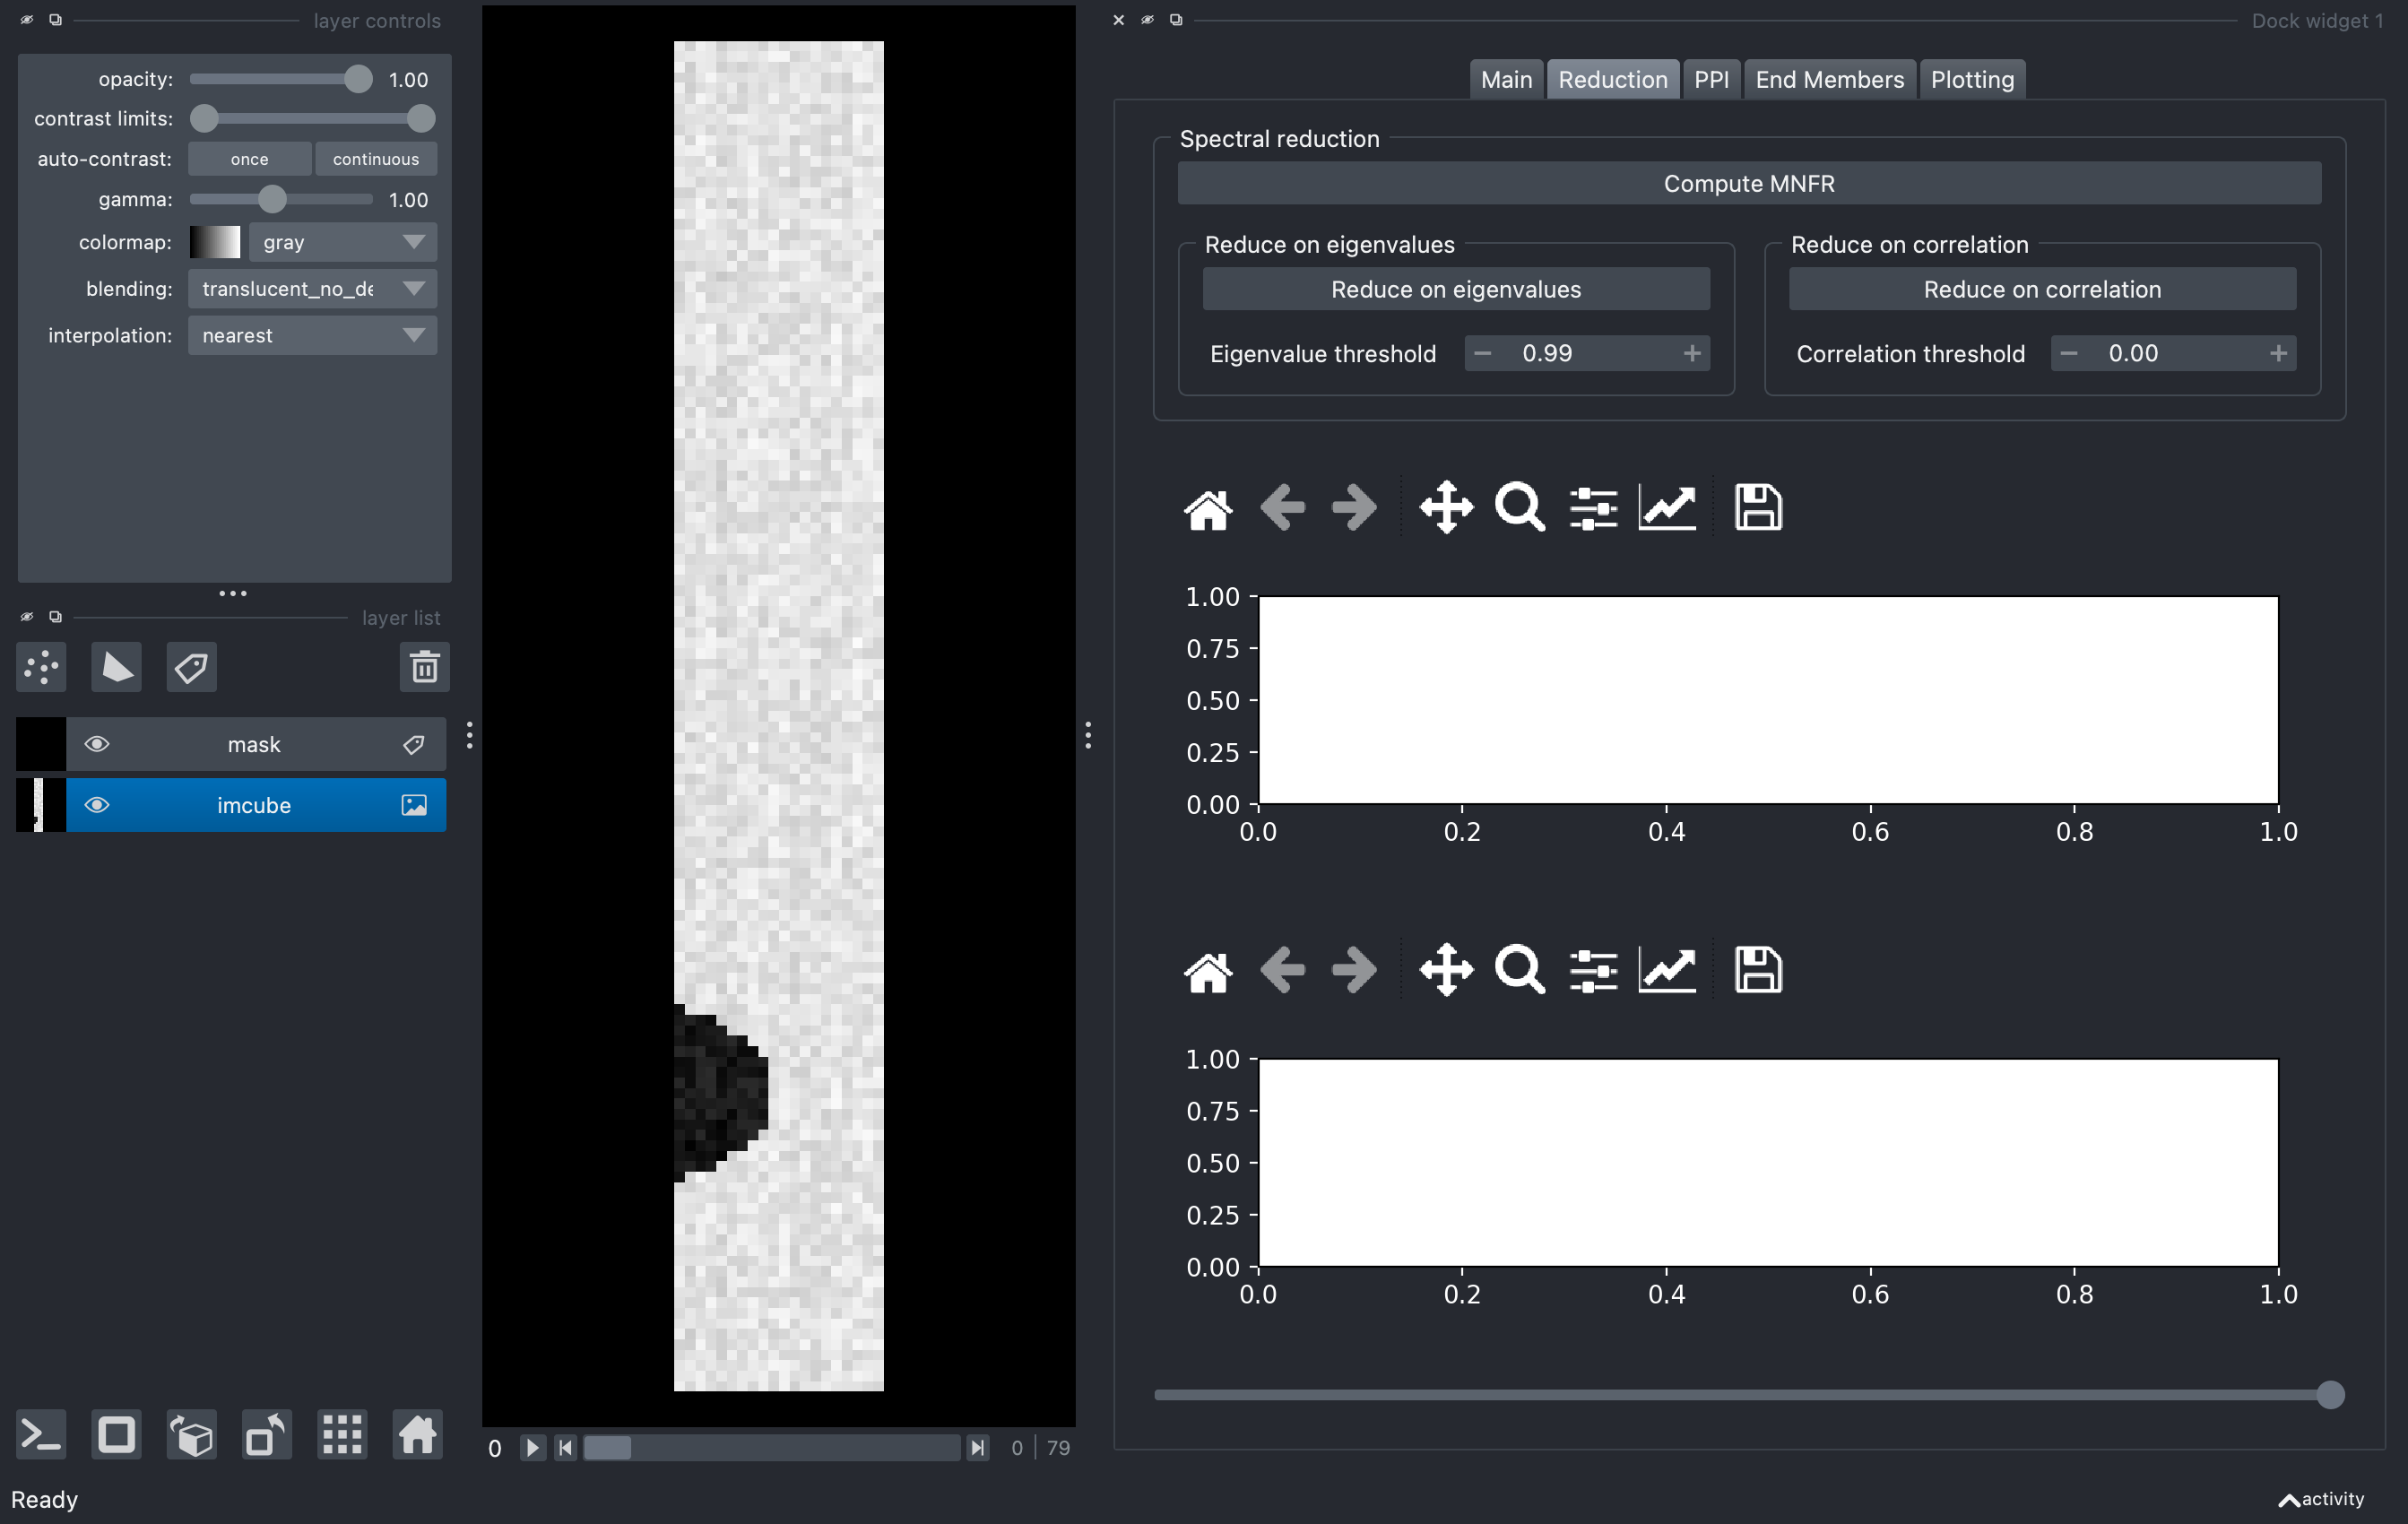

In [14]:
self.tabs.setCurrentIndex(1)
nbscreenshot(viewer)

In [15]:
self._on_click_mnfr()

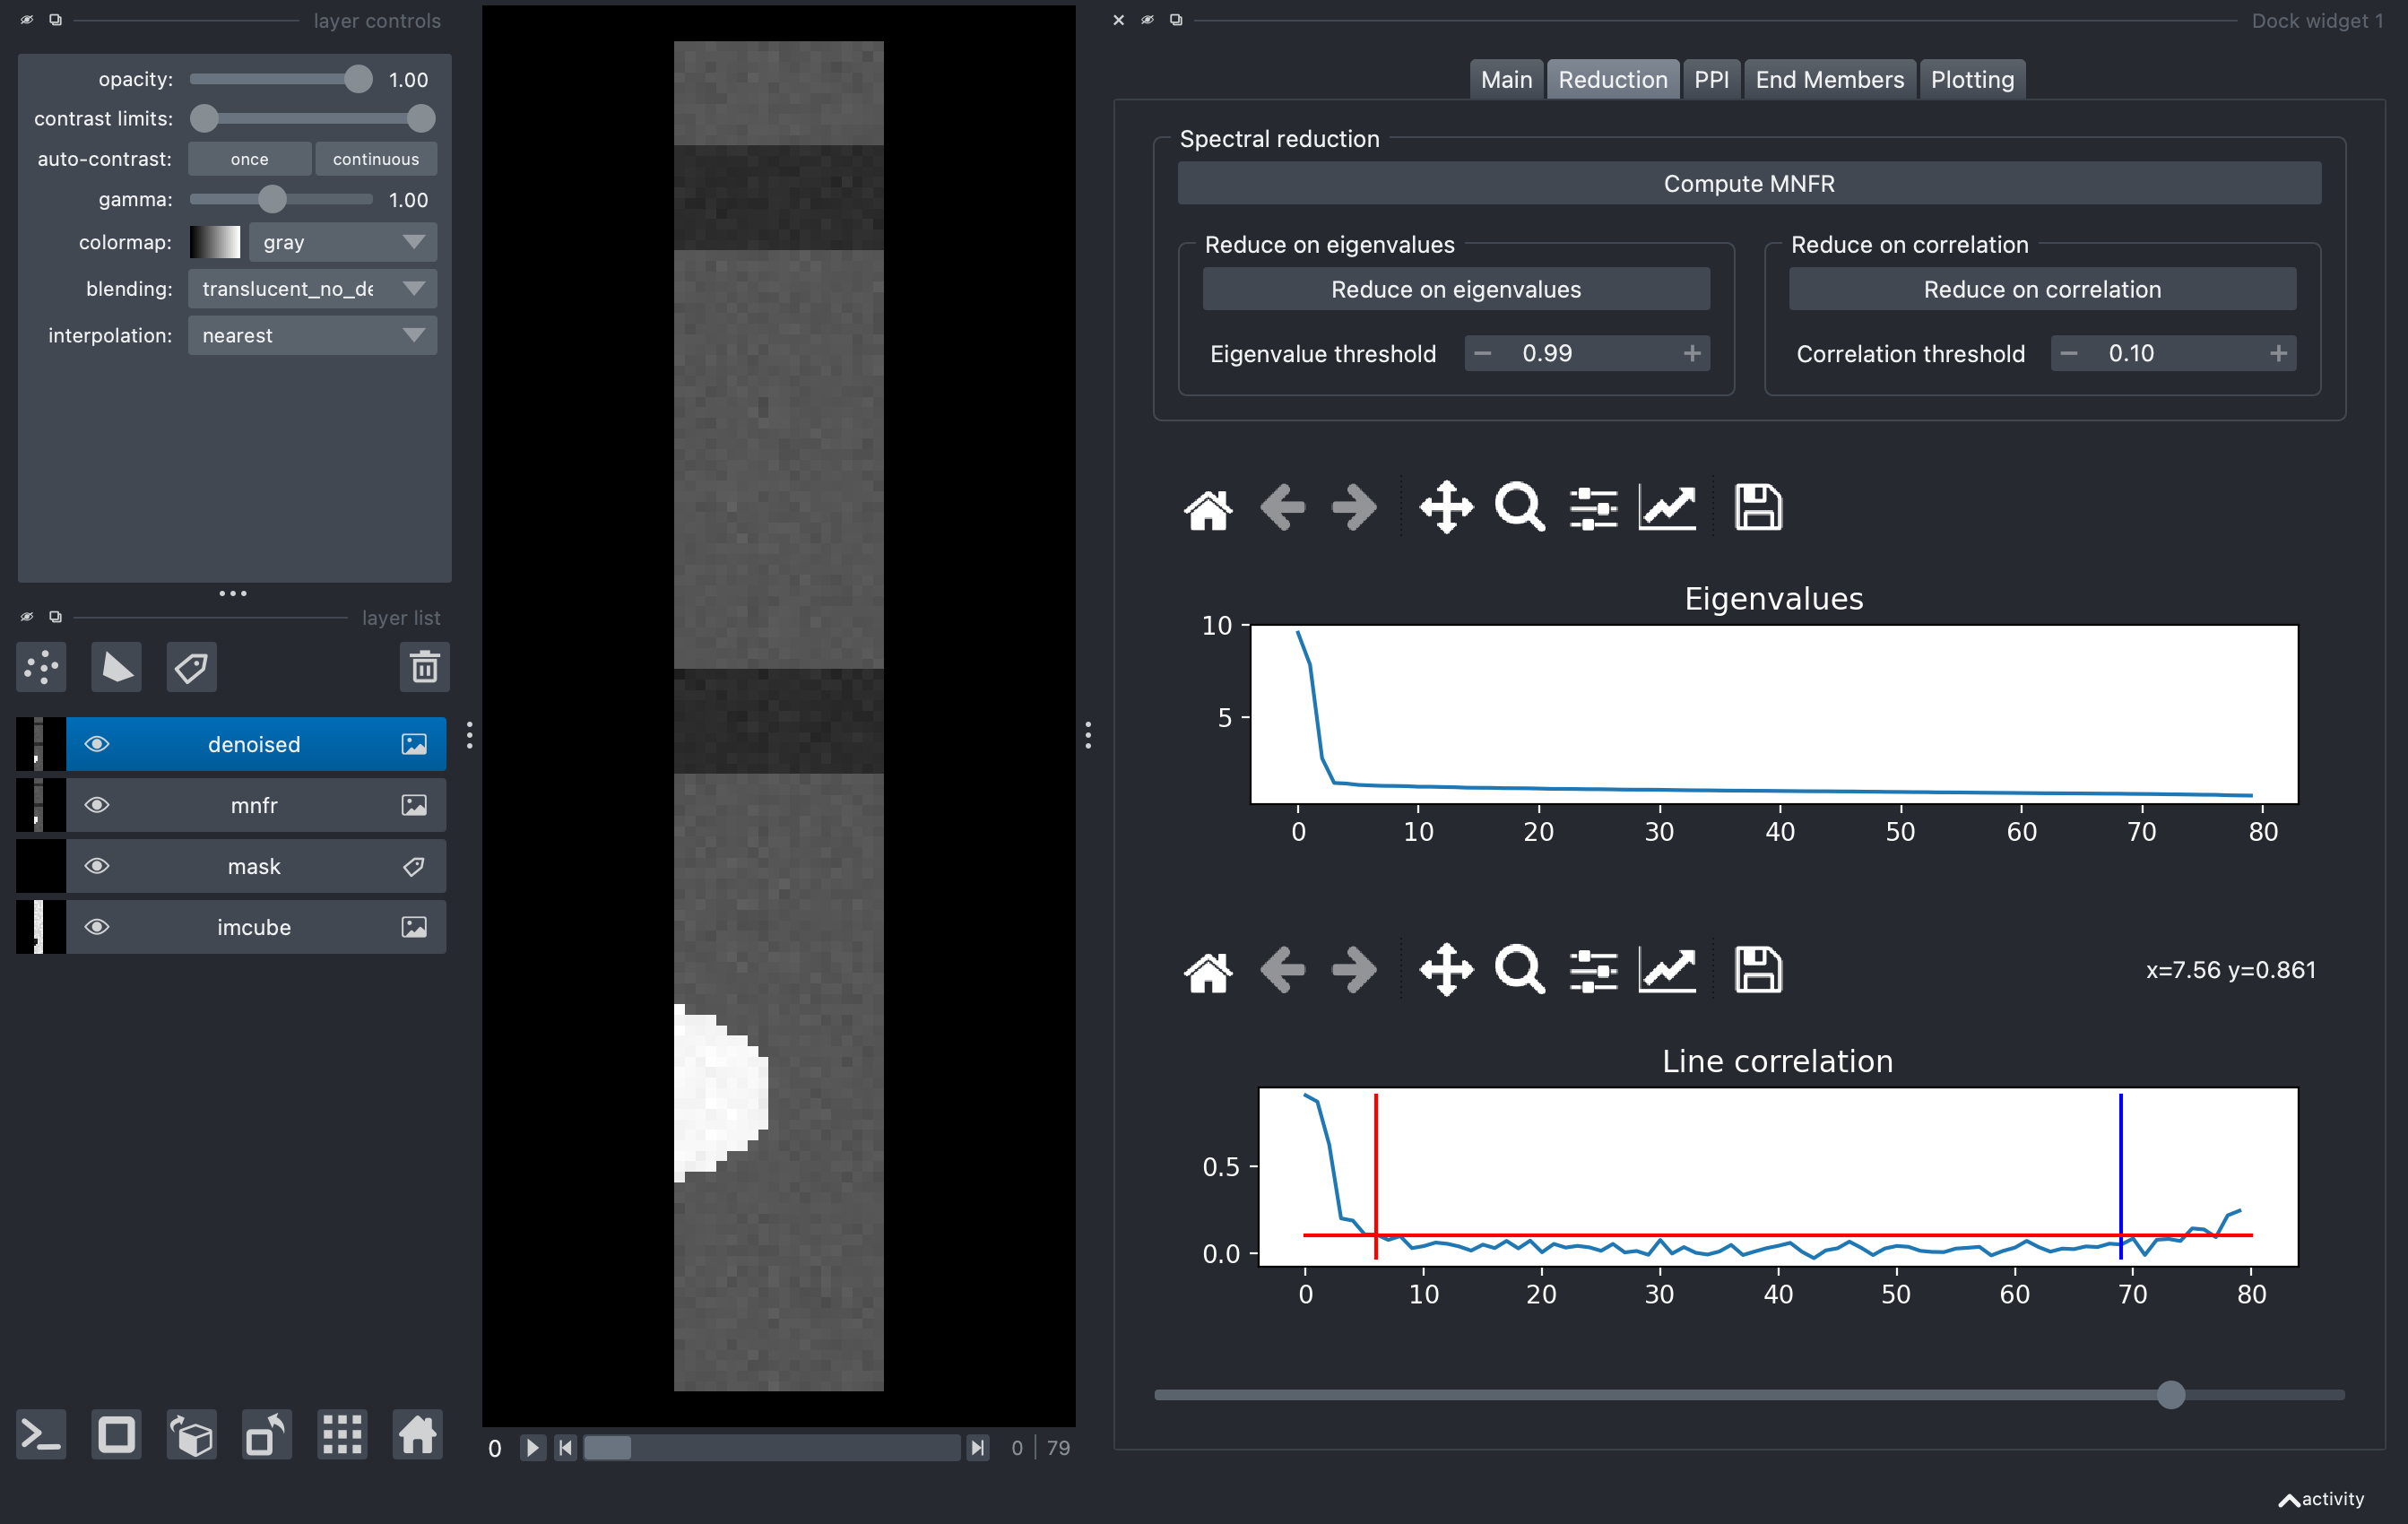

In [18]:
nbscreenshot(viewer)

This is performed in the following way:

1. A minimal noise fraction analysis is performed. This performs a sort of PCA and transforms the bands in a new "space" where the first series (high eigenvalues) contain a lot of information and the last bands contain only noise.
2. Once this sorting has been done, one needs to cutoff bands with low information. This can be done in two ways:
    - either by cutting off bands with low eigenvalues i.e. low information
    - or by analyzing how much vertical correlation exists in each band. If a band contains only noise, no correlation between rows is expected whereas if there are structures (as expected in sediment images) correlation is high
    
Setting the threshold on the eigevalues or correlation can be done by inputting a number or by interactively selecting a threshold on the plots visible below.

Note that artefacts can generate high correlations in some of the last bands. In that case, one can use the slider at the bottom to cutoff the region considered to compute the correlation threshold.

Once a threshold is selected, click on one of the ```Reduce on... ``` buttons. This creates a new layer ```denoised``` with the reduced data.

## PPI

Now that we deal with a dataset of reduced size we can detect **pure pixesl**, i.e. pixels that point in the direction of one of the axes (eignvector) of the new space defined by MNFR. Those pixels should be representative of specific elments present in the sample.

Three parameters can be set:
- Threshold PPI counts: have many times a single pixel should be identified as pure to be considered
- Theshold PPI project: at each PPI round one can choose to keep only the best candidate (purest pixel) or that pixel and those close to it. Using higher values here means that more pixesl will be classified as pure (even though they are less pure).

After clicking on PPI, a new layer indicating slected pixels appears:

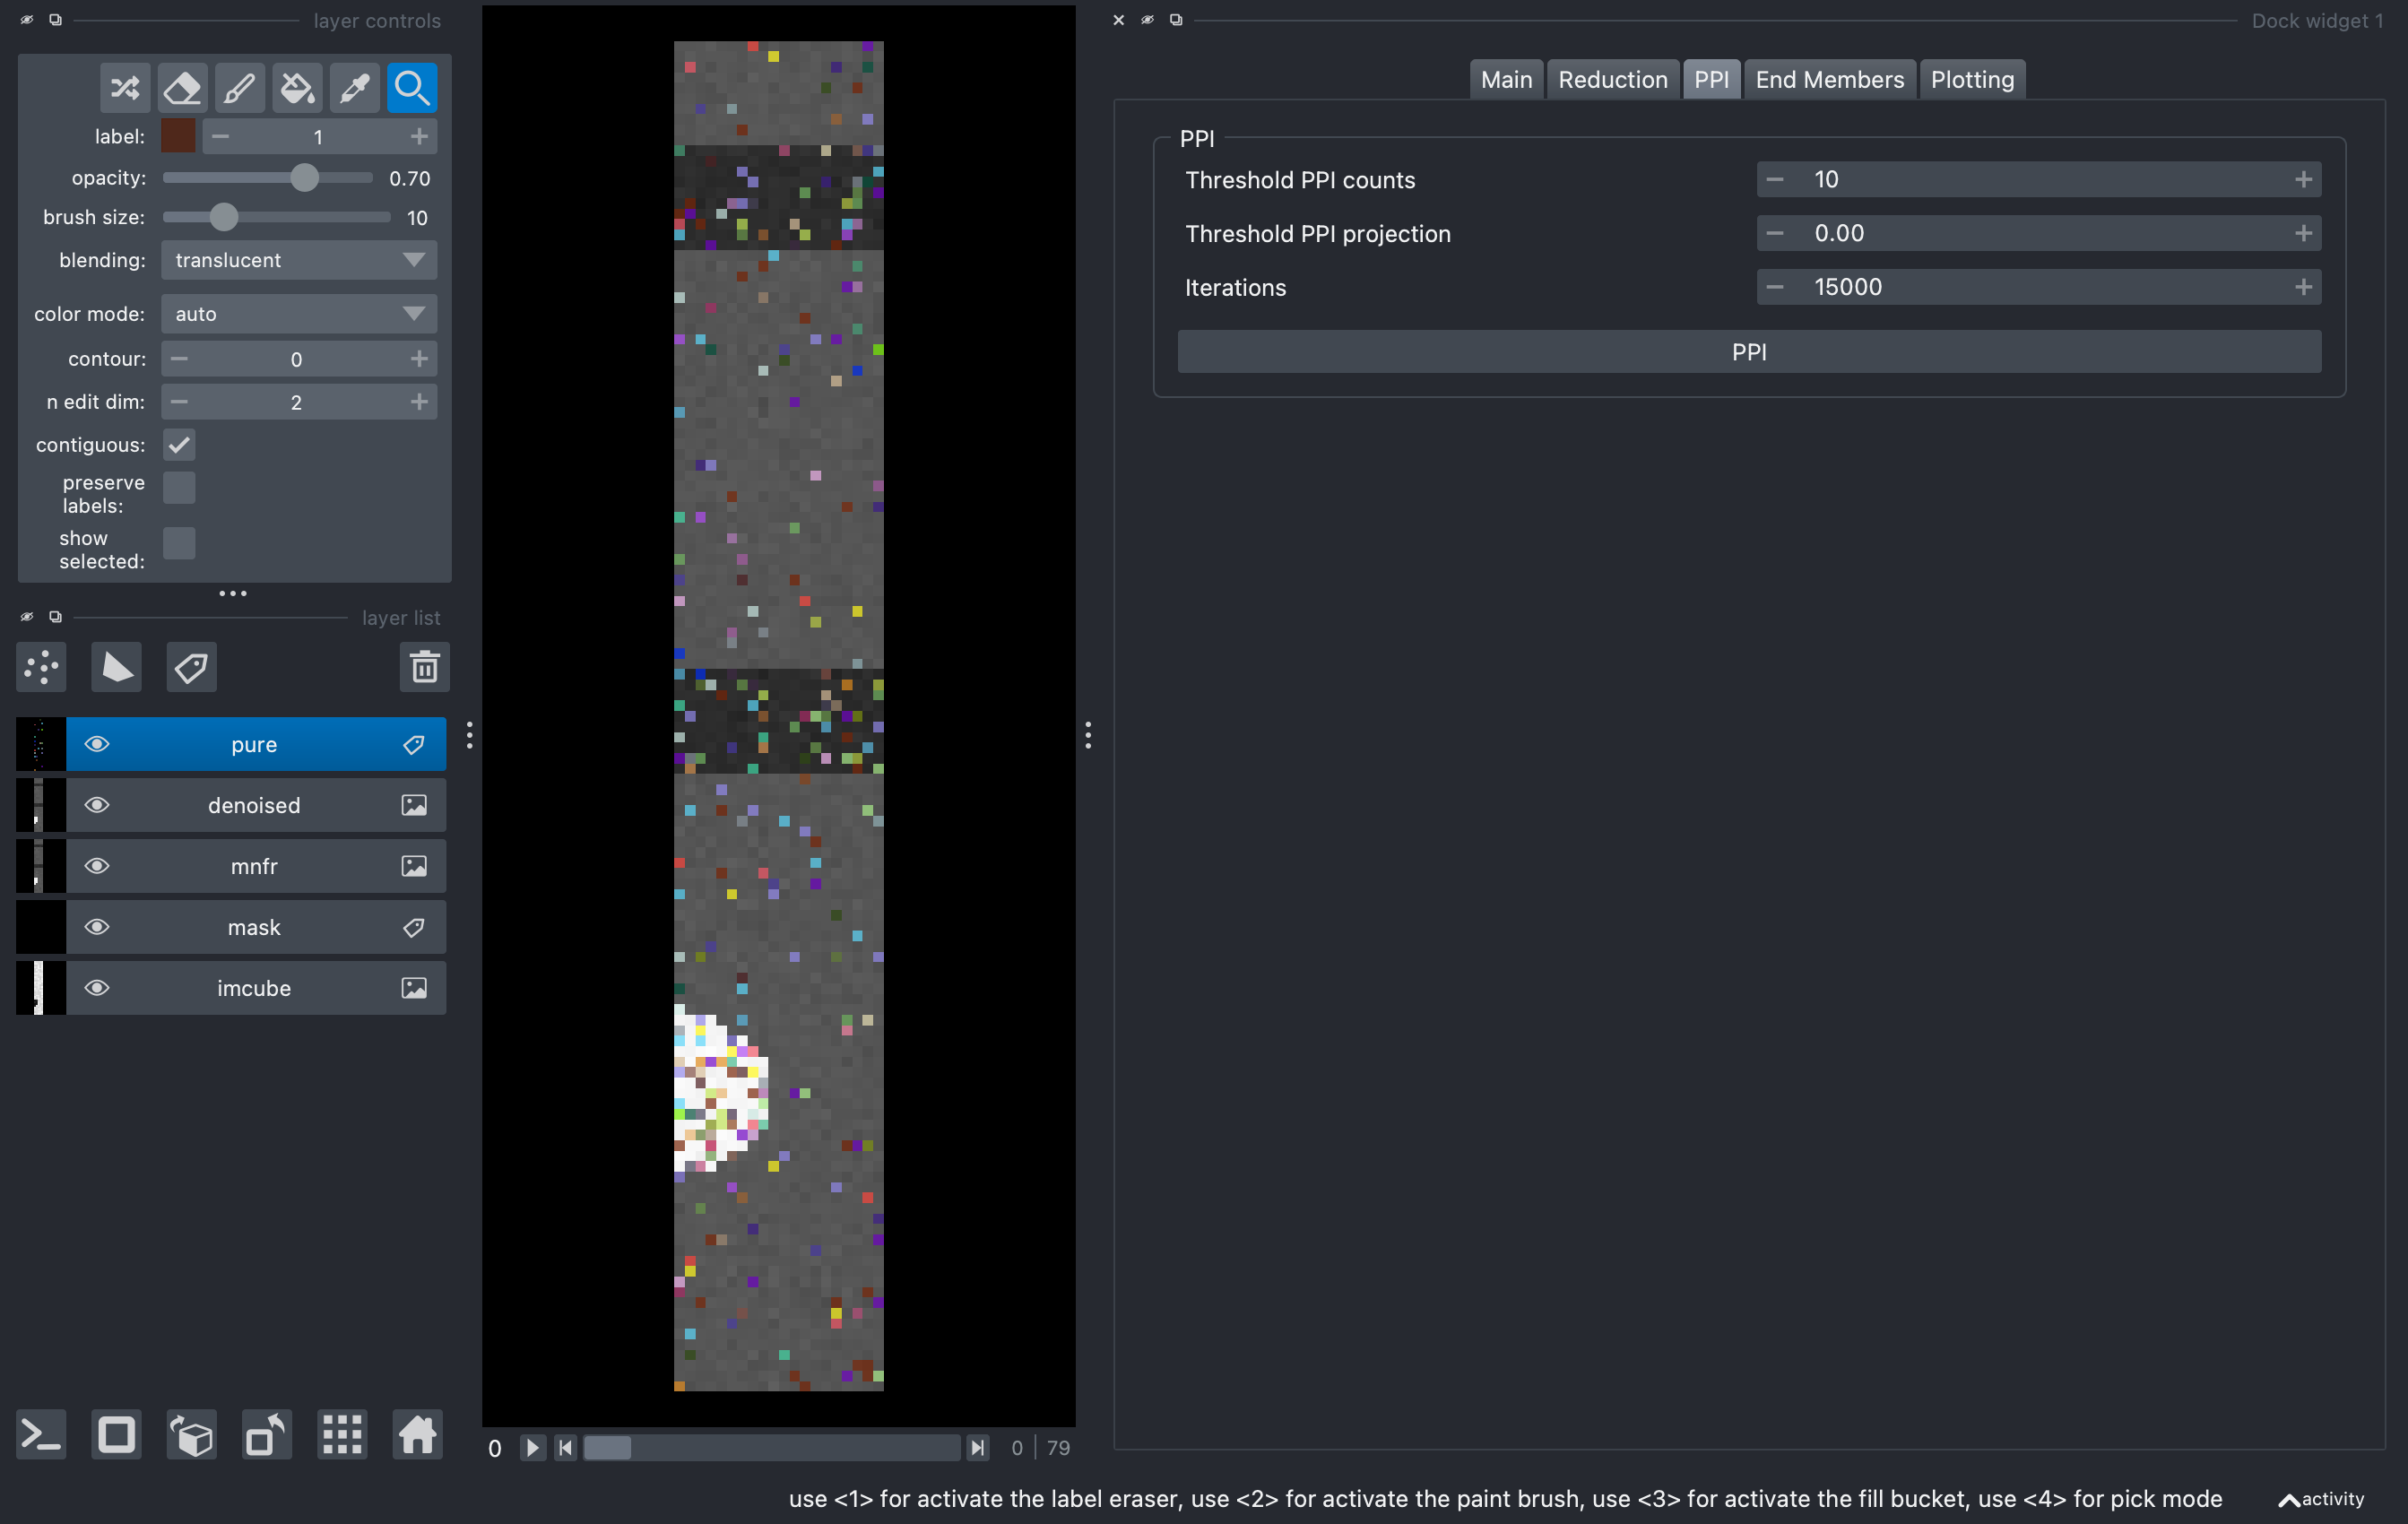

In [20]:
self.tabs.setCurrentIndex(2)
nbscreenshot(viewer)

## End Members

Finally, all the pure pixels have to be clustered in groups with similar spectra. Clustering is achieved using the DBSCAN algorithm for which one can set the maximal distance limit above which two points cannot belong to the same cluster. Adjusting this value can therefore increase (small values) or decrease (large values) the number of clusters.

Finally the spectra of all pure pixels belonging to a cluster is averaged and plotted. As we can see in this simplified example, the two "signal" spectra are identified (orange and green) while the other pixels represent background.

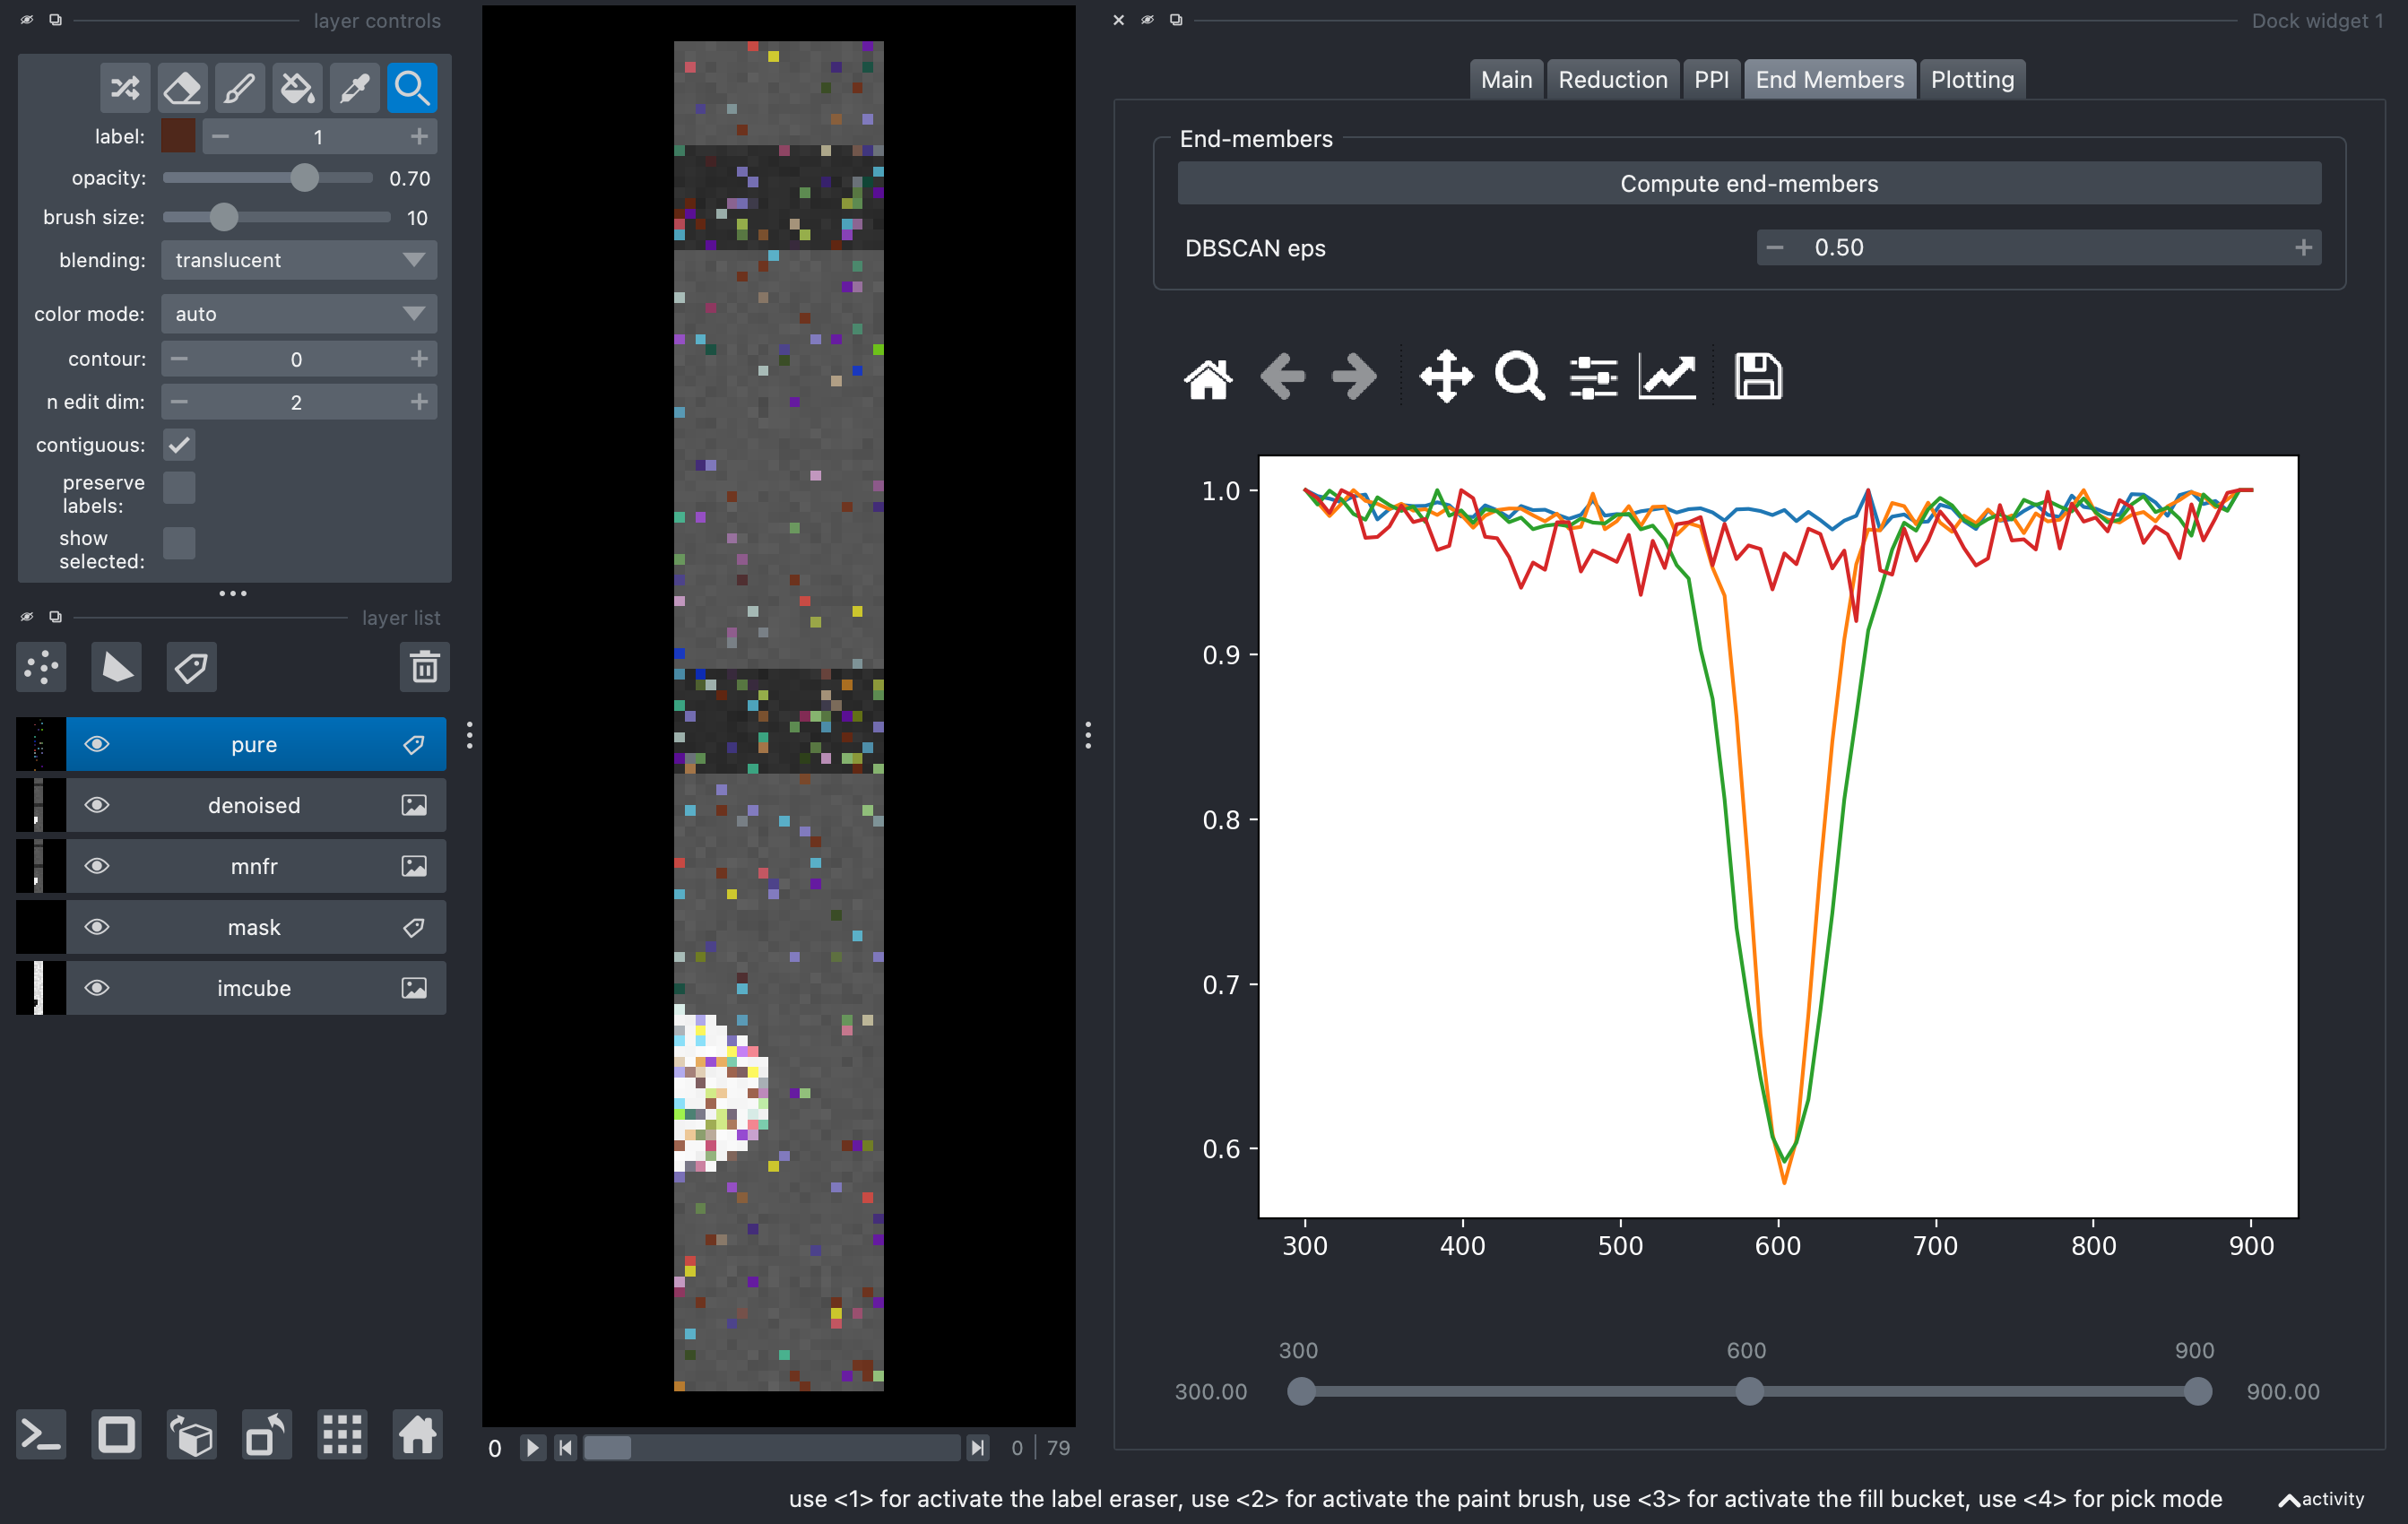

In [21]:
self.tabs.setCurrentIndex(3)
nbscreenshot(viewer)